# cmip Impacts 

This file makes lots of contour plots for rainfall and temperature anomalies under different individal and compound event types



In [1]:
#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
%run helpers/impactPlots.ipynb


In [2]:
import xarray
import numpy
import cartopy.crs as ccrs


In [3]:
indexSet='ecCombinedDmiSam'
resultsDir='results/cmipImpact/'

# Import Events

In [4]:
allEvents=xarray.open_dataset('results/cmipEcEvents.nc')

# Get Pr and Ts

Open total rainfall and temp means (from Pi Control)

In [5]:
meanXr=xarray.load_dataset('results/cmip6PrTsMeans.nc')

And open the seasonal anomalies

In [6]:
impactXr=xarray.concat(
    [xarray.open_dataset(
                'results/cmipSeasonPrTs/'+iModel+'ssp585.nc'
    ).sel(year=range(1850,2099)) for iModel in _model.scenarioMip[:,1]],
    'model', 
    coords='minimal', 
    compat='override'
).drop('height')

In [7]:
prXr=xarray.Dataset()
prXr['Winter Rain']=(impactXr.prWinter/(meanXr['prWinter']+meanXr['prSummer'])*100)
prXr['Summer Rain']=(impactXr.prSummer/(meanXr['prWinter']+meanXr['prSummer'])*100)

tsXr=(impactXr[['tsWinter','tsSummer']])
tsXr=tsXr.rename({'tsWinter':'Winter Temp','tsSummer':'Summer Temp'})

In [8]:
# A function to trim to the area of interest for this study
def domain(ds):
    return ds.where(
    (ds.lat<-28)
        *(ds.lat>-39)
        *(ds.lon>144)
        *(ds.lon<155),
    drop=True
)
    
    

I am calculating rainfall trends as a percent of the annual rain fall, by austral season

In [9]:
%run utils/emergence.ipynb

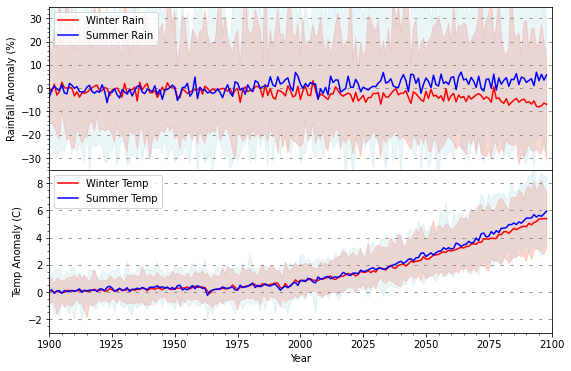

In [10]:
plt.figure(figsize=(9,6))

plt.subplot(2,1,1)

overlaidEmergePlot(domain(prXr).mean(['lon','lat']),)
plt.legend(loc='upper left')
plt.ylabel('Rainfall Anomaly (%)')
plt.xlim([1900,2100])
plt.ylim([-35,35])
plt.xticks([])
plt.grid(axis='y', color='grey', dashes=[4,8])


plt.subplot(2,1,2)

overlaidEmergePlot(domain(tsXr).mean(['lon','lat']))
plt.legend(loc='upper left')
plt.xlim([1900,2100])
plt.ylim([-3,9])
plt.ylabel('Temp Anomaly (C)')
plt.grid(axis='y', color='grey', dashes=[4,8])


plt.subplots_adjust(hspace=0)


plt.savefig('figures/cmip6RainTempTrends.pdf')

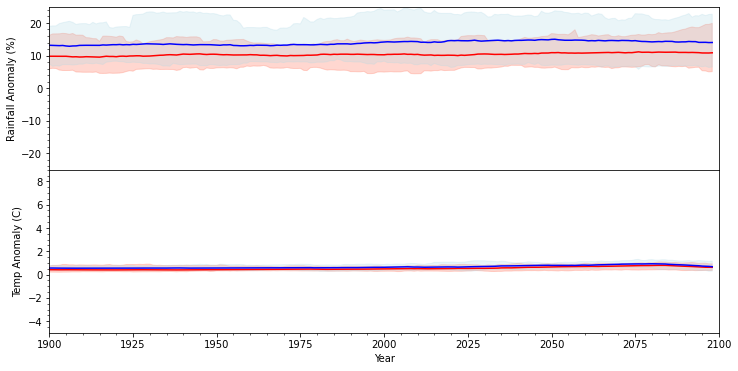

In [11]:
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)

overlaidEmergePlot(
        domain(prXr).mean(['lon','lat']).rolling(year=30,min_periods=15,center=True).std('year'),
)
plt.ylabel('Rainfall Anomaly (%)')
plt.xlim([1900,2100])
plt.ylim([-25,25])
plt.xticks([])

plt.subplot(2,1,2)

overlaidEmergePlot(
    domain(tsXr).mean(['lon','lat']).rolling(year=30,min_periods=15,center=True).std('year')
)
plt.xlim([1900,2100])
plt.ylim([-5,9])
plt.ylabel('Temp Anomaly (C)')

plt.subplots_adjust(hspace=0)


#plt.savefig('results/cmip6RainTempTrends.pdf')

{'whiskers': [<matplotlib.lines.Line2D at 0x150a093e19a0>,
 'caps': [<matplotlib.lines.Line2D at 0x150a093ef100>,
 'boxes': [<matplotlib.lines.Line2D at 0x150a093e15b0>],
 'medians': [<matplotlib.lines.Line2D at 0x150a093ef820>],
 'fliers': [<matplotlib.lines.Line2D at 0x150a093efbb0>],
 'means': []}

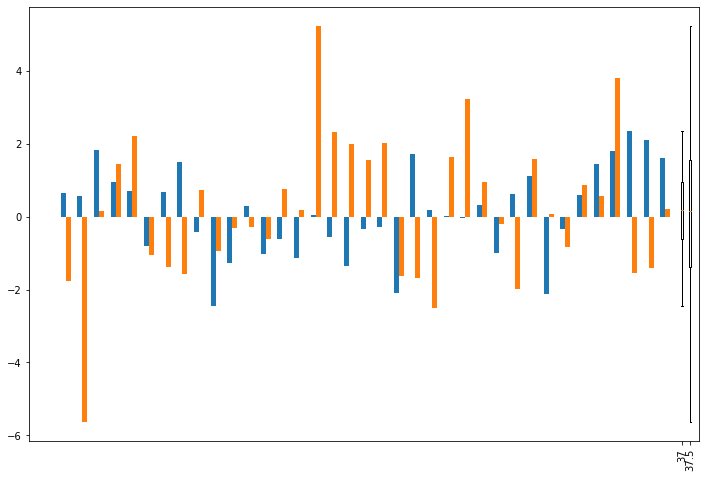

In [12]:
plotData=prXr['Summer Rain'].mean(['lon','lat'])

plt.figure(figsize=(12,8))

plt.bar(
    plotData.model, 
    plotData.sel(year=slice(1950,1999)).mean('year'),
    width=-0.3,
    align='edge'
)
junk=plt.xticks(rotation=90)
junk,models=plt.xticks()

plt.boxplot(
    plotData.sel(year=slice(1950,1999)).mean('year'), 
    positions=[(len(plotData.model.values))],
)

plt.bar(
    plotData.model, 
    plotData.sel(year=slice(2050,2099)).mean('year'),
    width=0.3,
    align='edge'
)

plt.boxplot(
    plotData.sel(year=slice(2050,2099)).mean('year'), 
    positions=[(len(plotData.model.values))+0.5],
)



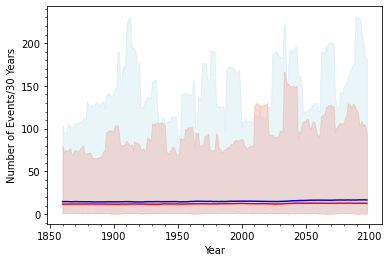

In [13]:
overlaidEmergePlot(prXr.rolling(year=11).std('year'))

# Mean state change

Mean rainfall anomaly for all models with one event

In [14]:
%run helpers/impactPlots.ipynb

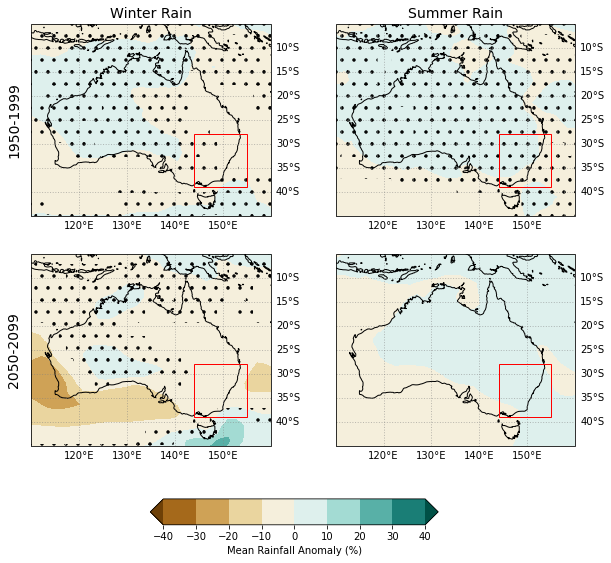

In [23]:
fig=plt.figure(figsize=(10,12))
import matplotlib.cm as cm
import matplotlib.colorbar as cb

#make a sub plot
ax=fig.add_subplot(
    3, 2,  1, projection=ccrs.PlateCarree()
)
plotAnom(
    prXr['Winter Rain'].sel(year=slice(1950,1999)).mean(['model','year']),
    ax, 
)
plotStipling(
    prXr['Winter Rain'].sel(year=slice(1950,1999)).mean(['year']),
    ax, 
)
plt.ylim([-45,-5])
plt.xlim([110,160])
ax.text(
    -0.1, 0.5,  #xy relative to bottom left of axis
    '1950-1999',
    rotation='vertical', 
    transform=ax.transAxes, 
    verticalalignment='center', 
    fontsize=14
)
plt.title('Winter Rain',{'fontsize':14})
ax=fig.add_subplot(
    3, 2,  3, projection=ccrs.PlateCarree()
)
plotAnom(
    prXr['Winter Rain'].sel(year=slice(2050,2099)).mean(['model','year']),
    ax, 
)
plotStipling(
    prXr['Winter Rain'].sel(year=slice(2050,2099)).mean(['year']),
    ax, 
)
plt.ylim([-45,-5])
plt.xlim([110,160])
ax.text(
    -0.1, 0.5,  #xy relative to bottom left of axis
    '2050-2099',
    rotation='vertical', 
    transform=ax.transAxes, 
    verticalalignment='center', 
    fontsize=14
)

ax=fig.add_subplot(
    3, 2,  2, projection=ccrs.PlateCarree()
)
plotAnom(
    prXr['Summer Rain'].sel(year=slice(1950,1999)).mean(['model','year']),
    ax, 
)
plotStipling(
    prXr['Summer Rain'].sel(year=slice(1950,1999)).mean(['year']),
    ax, 
)

plt.ylim([-45,-5])
plt.xlim([110,160])
plt.title('Summer Rain',{'fontsize':14})

ax=fig.add_subplot(
    3, 2,  4, projection=ccrs.PlateCarree()
)
cs=plotAnom(
    prXr['Summer Rain'].sel(year=slice(2050,2099)).mean(['model','year']),
    ax, 
)
plt.ylim([-45,-5])
plt.xlim([110,160])

ax=fig.add_axes([0.3,0.3,0.4,0.03])
cbar=plt.colorbar(
    cm.ScalarMappable(cs.norm,cs.cmap),
    orientation='horizontal', 
    cax=ax, 
    extend='both', 
    boundaries=cs.get_array(), 
    label = 'Mean Rainfall Anomaly (%)',
)


plt.savefig('figures/cmip6RainSpatialTrends.pdf', bbox_inches='tight')
    

# Single event impacts

In [16]:
fireEventsXr=allEvents.sel(experiment='ssp585', year=range(1850,2099),drop=True)

In [19]:
#temperature gets detrended
trendXr=tsXr.rolling(year=31,min_periods=15,center=True).mean('year')
detrendTsXr=(tsXr-trendXr)

In [24]:
eventsList=['ecCombined','dmi','samWinter','samSummer']
maskXr = (fireEventsXr[eventsList]==1)
everythingXr=(fireEventsXr['nino34'].isnull()==False)
everythingXr.name='everything'

Fire:pos
winter


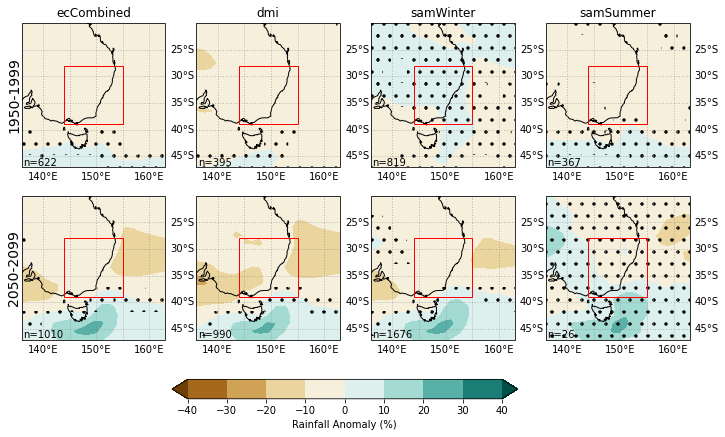

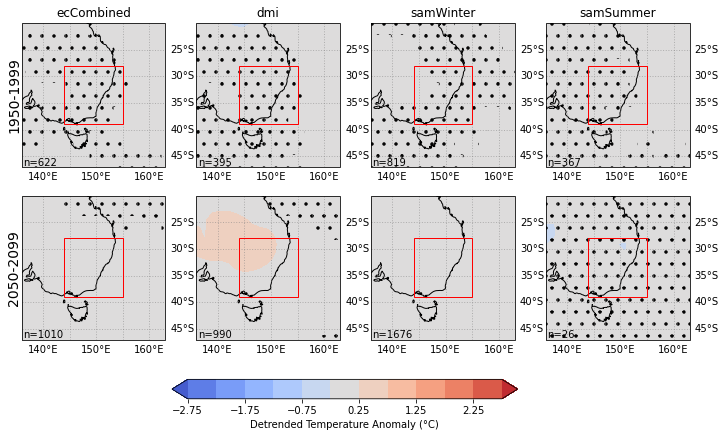

summer


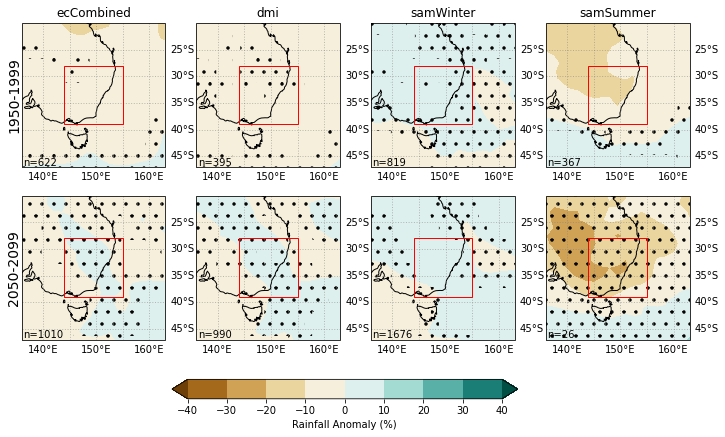

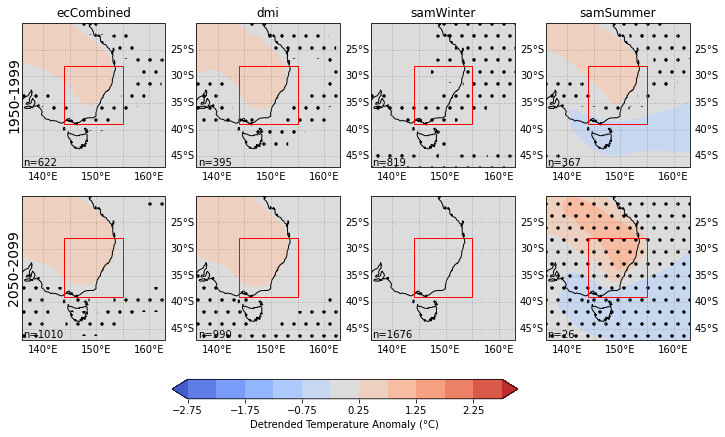

Fire:neg
winter


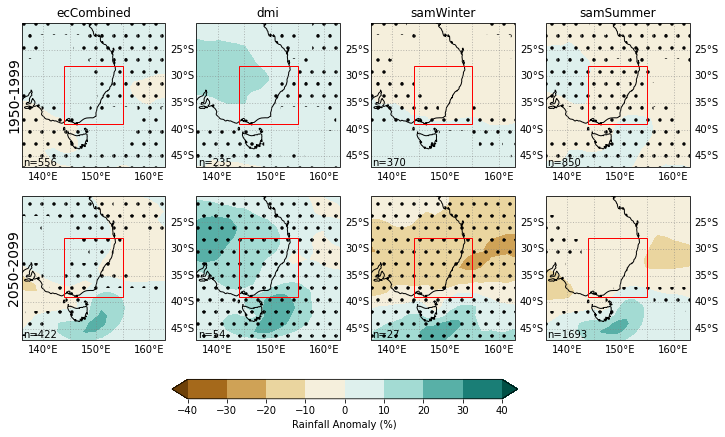

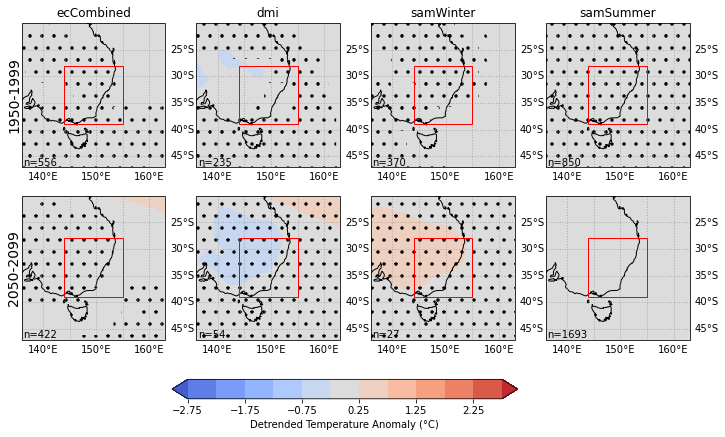

summer


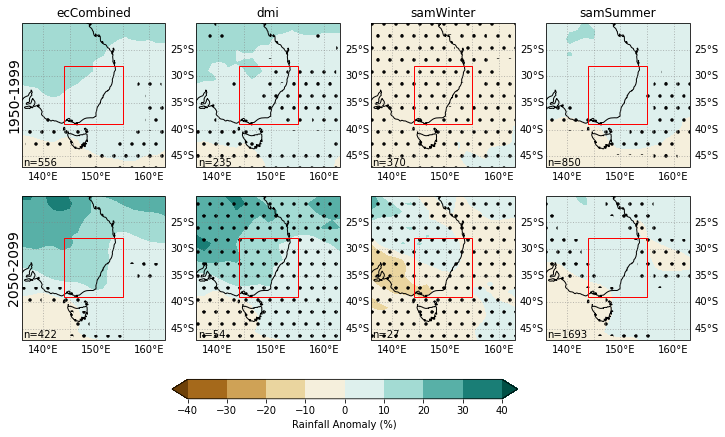

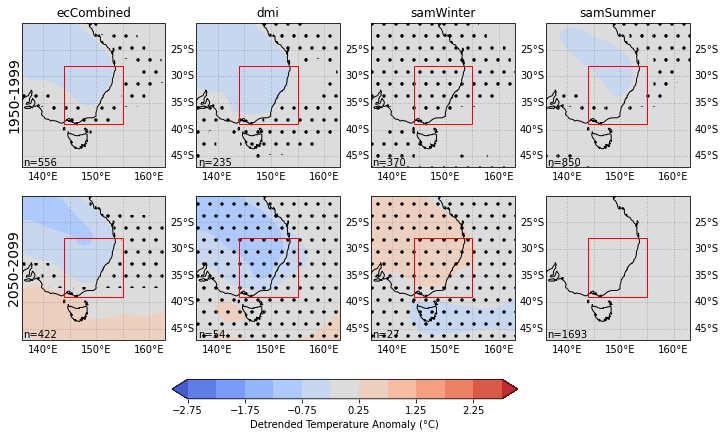

In [25]:
%run helpers/impactPlots.ipynb
for iFire in ['pos','neg']:
    print('Fire:'+iFire)
    for iSeason in ['winter','summer']:
        print(iSeason)
        axs=multiPlotter(
            prXr[iSeason.capitalize()+' Rain'], #sourceData
            maskXr.sel(fire=iFire,drop=True), #masks for event types
            eventsList, #names of event types
            cbarLabel='Rainfall Anomaly (%)'
        )
        plt.show()
        
        axs=multiPlotter(
            detrendTsXr[iSeason.capitalize()+' Temp'],
            maskXr.sel(fire=iFire,drop=True),
            eventsList,
            cbarLabel='Detrended Temperature Anomaly (°C)'
        )
        plt.show()

# ENSO index comparison

In [17]:
eventsList=['eIndex','cIndex','ecCombined','nino34','nino4']
maskXr = (fireEventsXr[eventsList]==1)
everythingXr=(fireEventsXr['nino34'].isnull()==False)
everythingXr.name='everything'

Fire:pos
winter


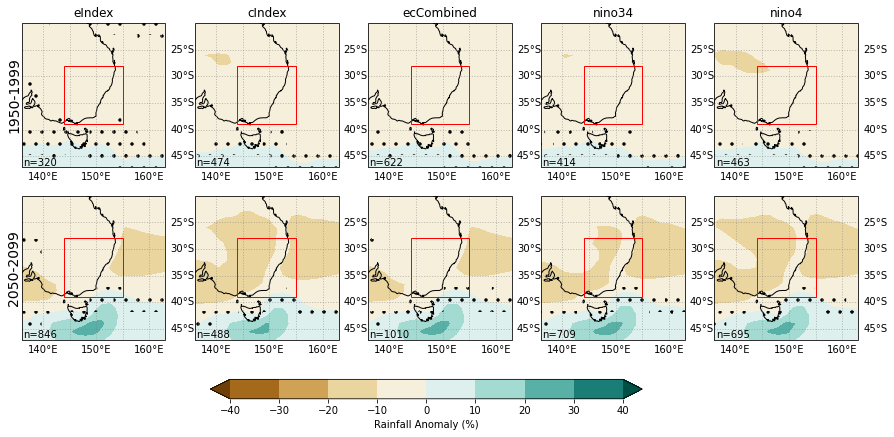

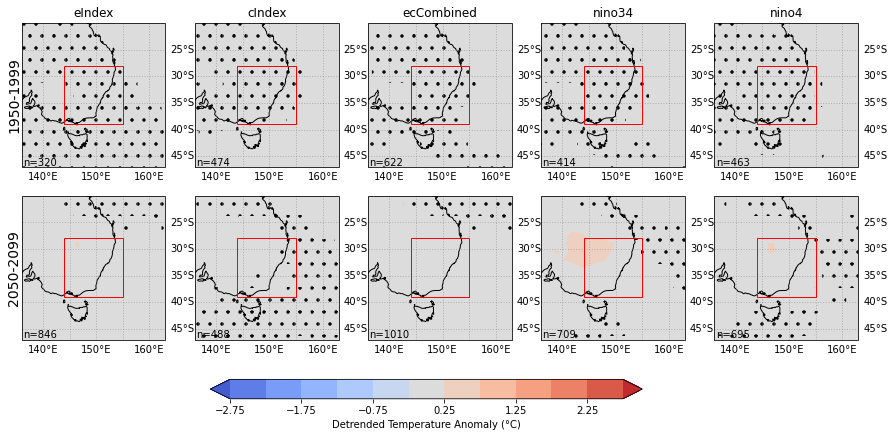

summer


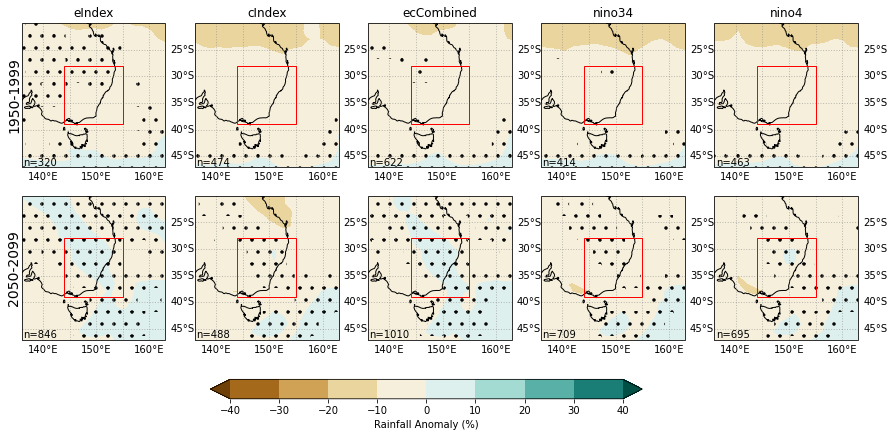

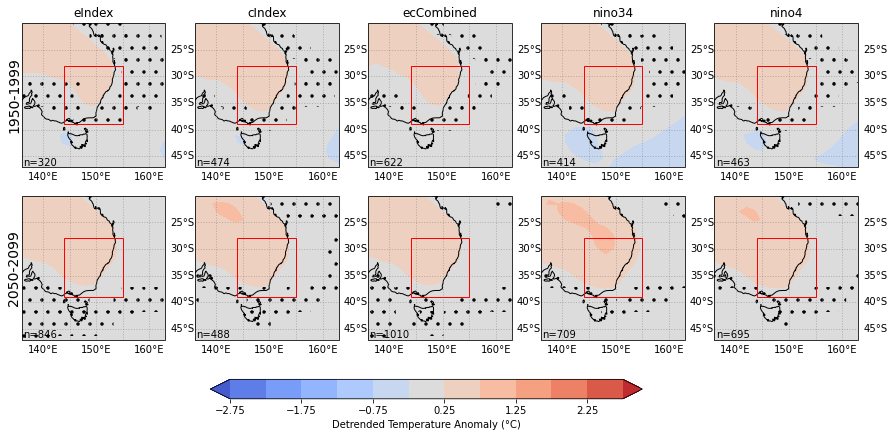

Fire:neg
winter


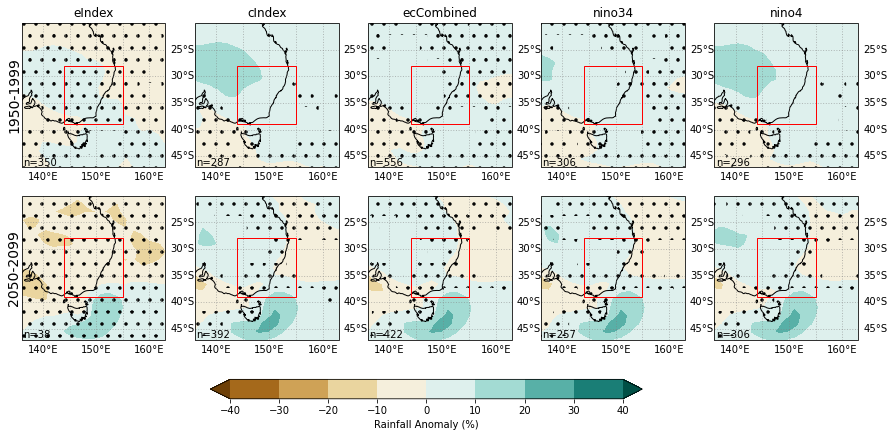

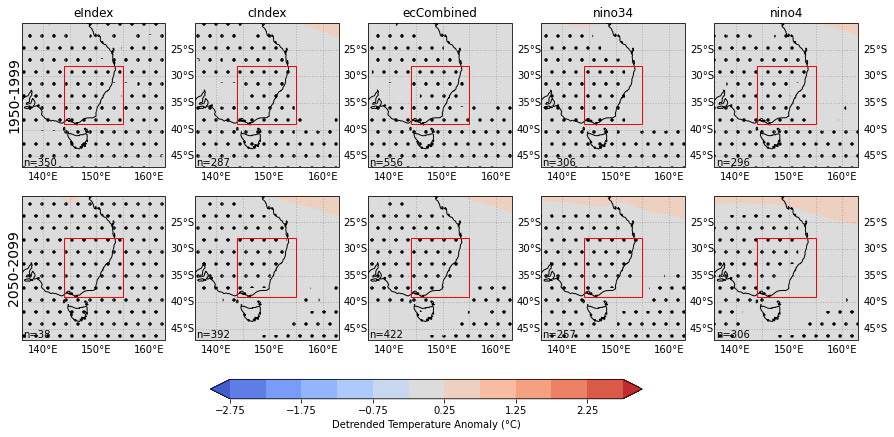

summer


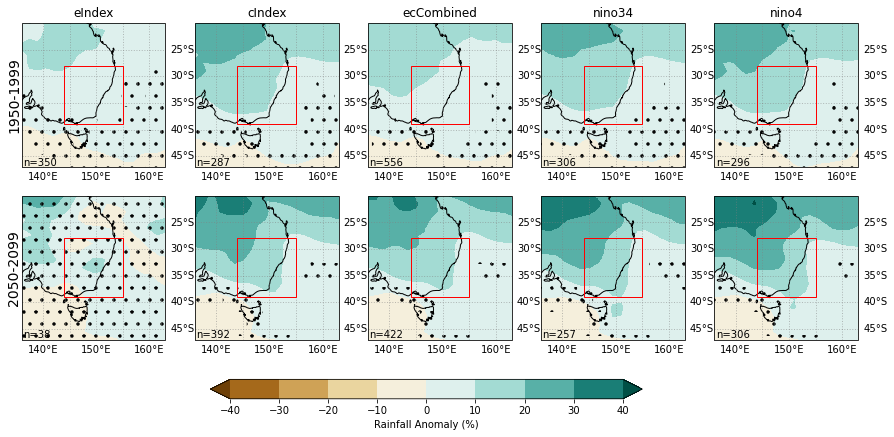

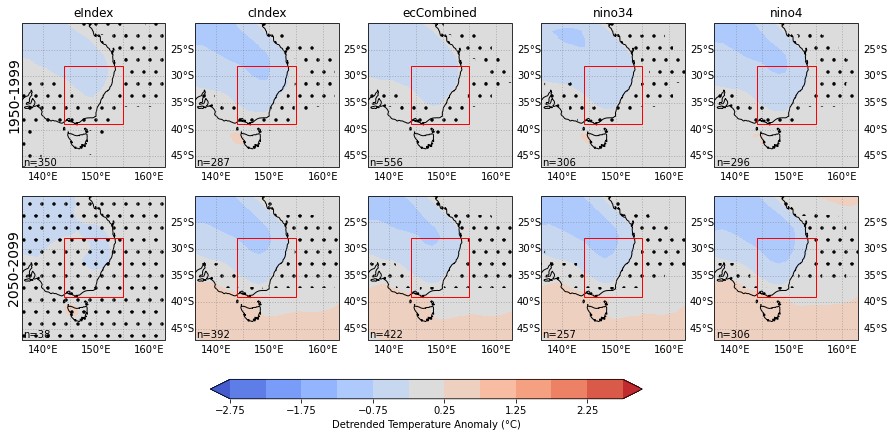

In [20]:
%run helpers/impactPlots.ipynb
for iFire in ['pos','neg']:
    print('Fire:'+iFire)
    for iSeason in ['winter','summer']:
        print(iSeason)
        axs=multiPlotter(
            prXr[iSeason.capitalize()+' Rain'], #sourceData
            maskXr.sel(fire=iFire,drop=True), #masks for event types
            eventsList, #names of event types
            cbarLabel='Rainfall Anomaly (%)'
        )
        #axs[0].set_title('ENSO+IOD')
        #axs[1].set_title('ENSO+SAM')
        #axs[2].set_title('IOD+SAM')
        #axs[3].set_title('All3')
        plt.show()
        
        axs=multiPlotter(
            detrendTsXr[iSeason.capitalize()+' Temp'],
            maskXr.sel(fire=iFire,drop=True),
            eventsList,
            cbarLabel='Detrended Temperature Anomaly (°C)'
        )
        #axs[0].set_title('ENSO+IOD')
        #axs[1].set_title('ENSO+SAM')
        #axs[2].set_title('IOD+SAM')
        #axs[3].set_title('All3')
        plt.show()

ACCESS-CM2
Fire:pos
1950-1999


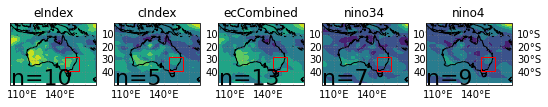

2050-2099


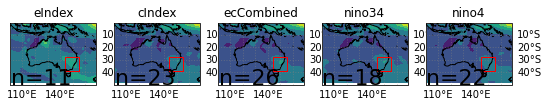

ACCESS-ESM1-5
Fire:pos
1950-1999


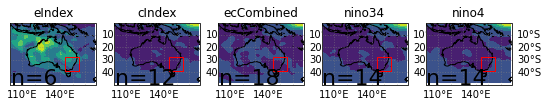

2050-2099


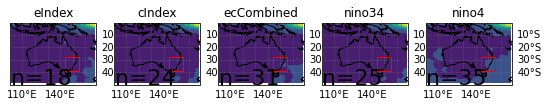

AWI-CM-1-1-MR
Fire:pos
1950-1999


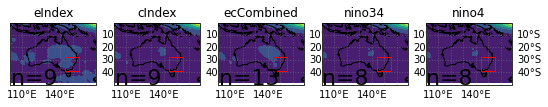

2050-2099


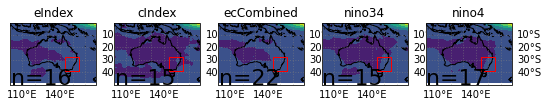

BCC-CSM2-MR
Fire:pos
1950-1999


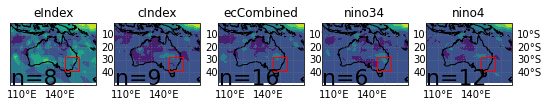

2050-2099


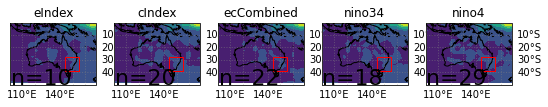

CAMS-CSM1-0
Fire:pos
1950-1999


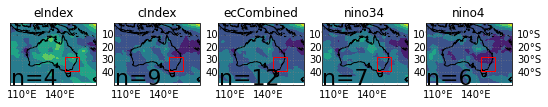

2050-2099


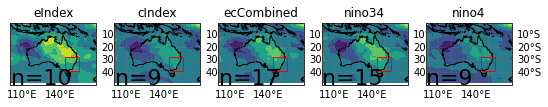

CAS-ESM2-0
Fire:pos
1950-1999


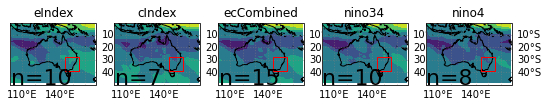

2050-2099


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


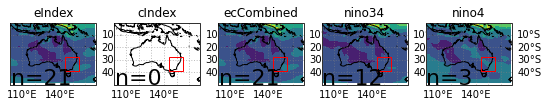

CESM2
Fire:pos
1950-1999


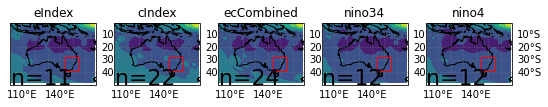

2050-2099


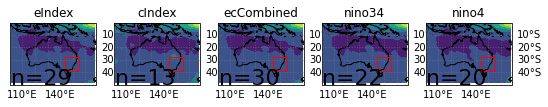

CESM2-WACCM
Fire:pos
1950-1999


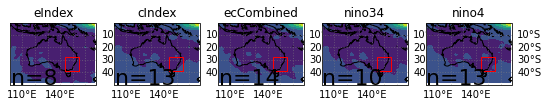

2050-2099


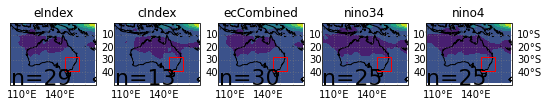

CIESM
Fire:pos
1950-1999


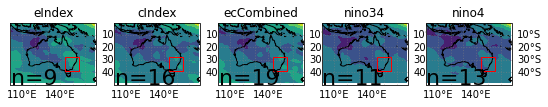

2050-2099


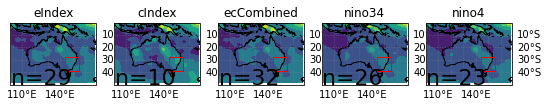

CMCC-CM2-SR5
Fire:pos
1950-1999


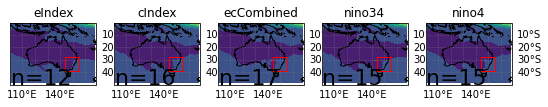

2050-2099


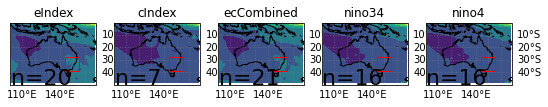

CMCC-ESM2
Fire:pos
1950-1999


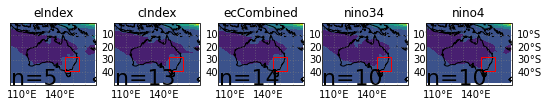

2050-2099


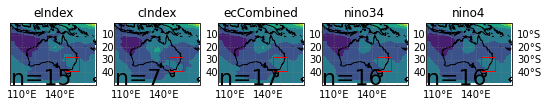

CNRM-CM6-1
Fire:pos
1950-1999


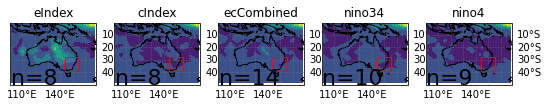

2050-2099


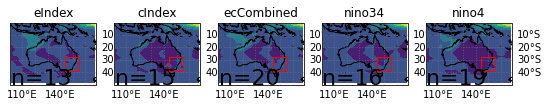

CNRM-ESM2-1
Fire:pos
1950-1999


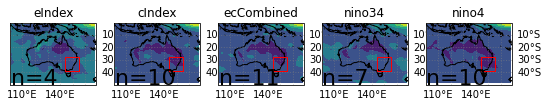

2050-2099


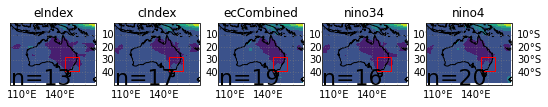

CanESM5
Fire:pos
1950-1999


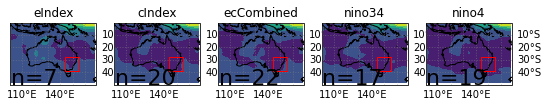

2050-2099


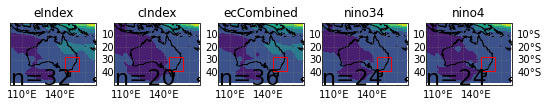

CanESM5-CanOE
Fire:pos
1950-1999


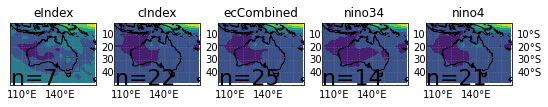

2050-2099


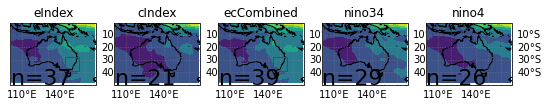

EC-Earth3
Fire:pos
1950-1999


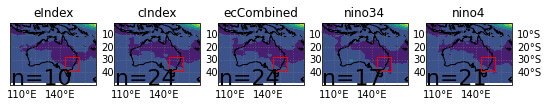

2050-2099


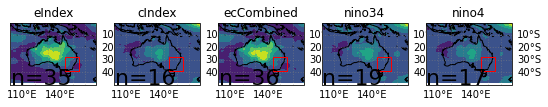

EC-Earth3-CC
Fire:pos
1950-1999


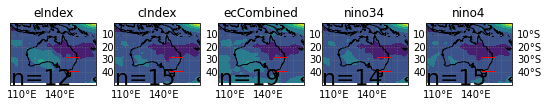

2050-2099


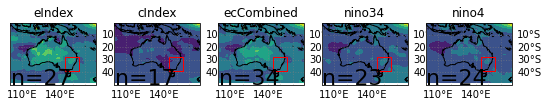

EC-Earth3-Veg
Fire:pos
1950-1999


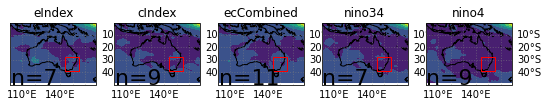

2050-2099


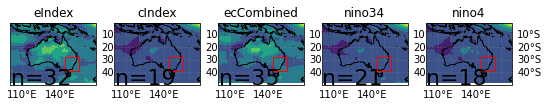

EC-Earth3-Veg-LR
Fire:pos
1950-1999


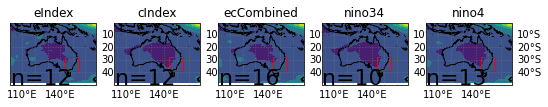

2050-2099


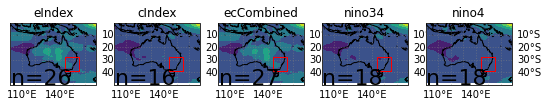

GFDL-CM4
Fire:pos
1950-1999


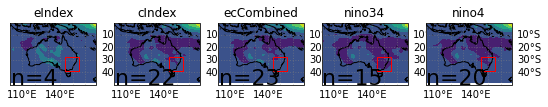

2050-2099


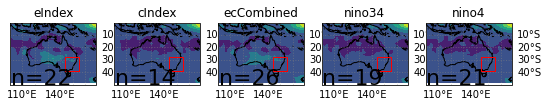

GFDL-ESM4
Fire:pos
1950-1999


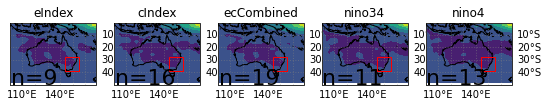

2050-2099


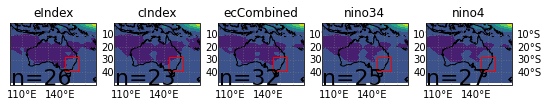

GISS-E2-1-G
Fire:pos
1950-1999


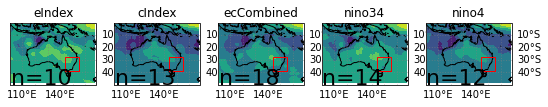

2050-2099


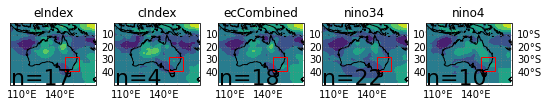

HadGEM3-GC31-LL
Fire:pos
1950-1999


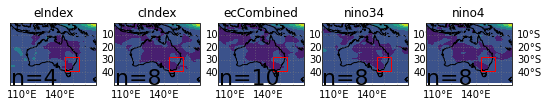

2050-2099


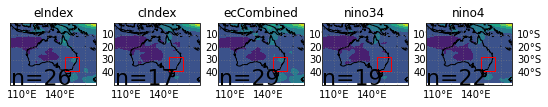

HadGEM3-GC31-MM
Fire:pos
1950-1999


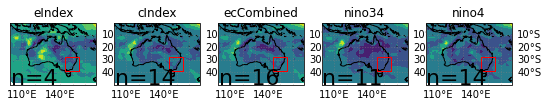

2050-2099


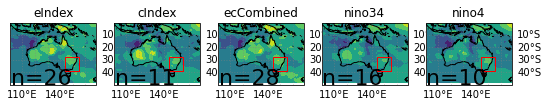

INM-CM4-8
Fire:pos
1950-1999


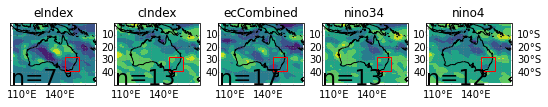

2050-2099


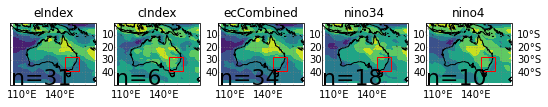

INM-CM5-0
Fire:pos
1950-1999


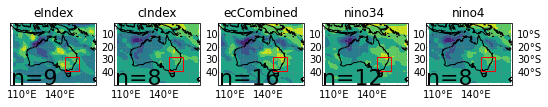

2050-2099


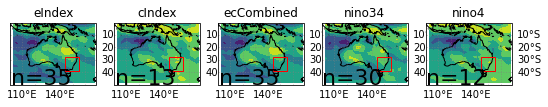

IPSL-CM6A-LR
Fire:pos
1950-1999


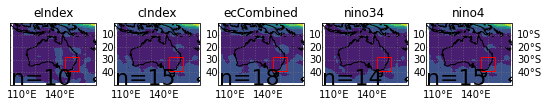

2050-2099


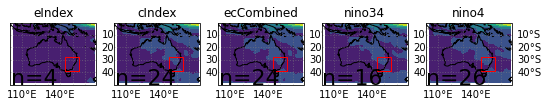

MCM-UA-1-0
Fire:pos
1950-1999


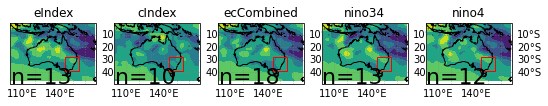

2050-2099


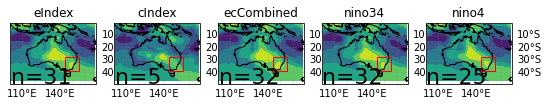

MIROC-ES2L
Fire:pos
1950-1999


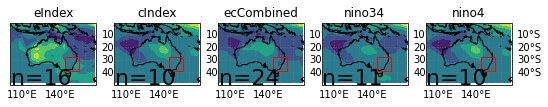

2050-2099


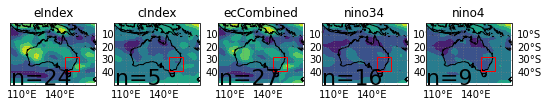

MIROC6
Fire:pos
1950-1999


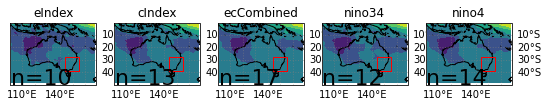

2050-2099


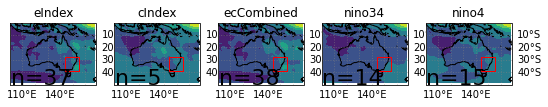

MPI-ESM1-2-HR
Fire:pos
1950-1999


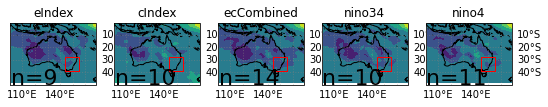

2050-2099


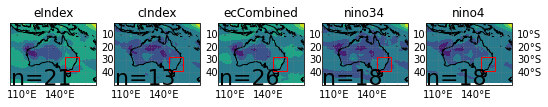

MPI-ESM1-2-LR
Fire:pos
1950-1999


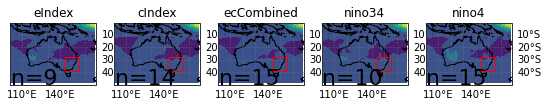

2050-2099


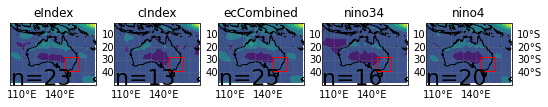

MRI-ESM2-0
Fire:pos
1950-1999


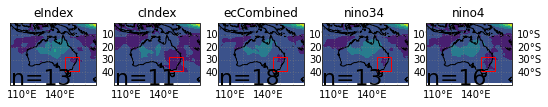

2050-2099


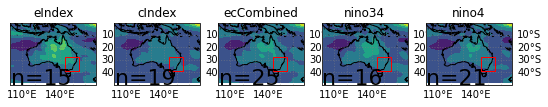

NESM3
Fire:pos
1950-1999


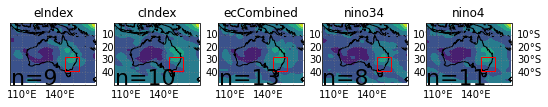

2050-2099


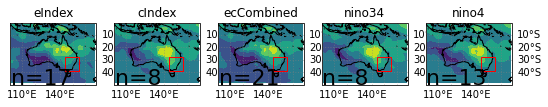

NorESM2-LM
Fire:pos
1950-1999


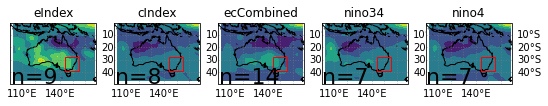

2050-2099


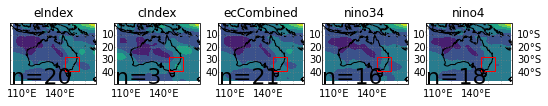

NorESM2-MM
Fire:pos
1950-1999


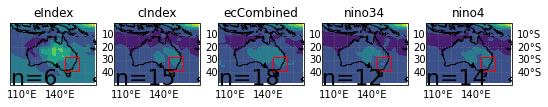

2050-2099


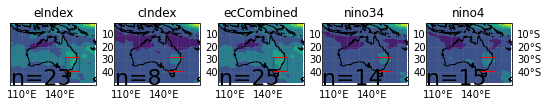

UKESM1-0-LL
Fire:pos
1950-1999


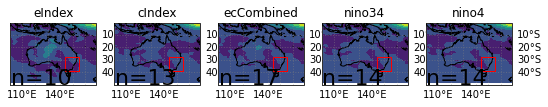

2050-2099


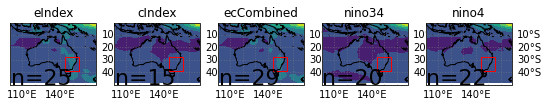

In [21]:
for iModel in prXr.model.values:
    print(iModel)
    for iFire in ['pos']:#,'neg']:
        print('Fire:'+iFire)
        for iSeason in [#'winter',
            'summer']:
            print('1950-1999')
            indexPlotter(
                prXr[iSeason.capitalize()+' Rain'].sel(model=iModel).rename('prPercent'),
                maskXr.sel(fire=iFire,model=iModel,year=slice(1950,1999),drop=True), 
                eventsList,
                stipling=False
            )
            plt.show()
            print('2050-2099')
            indexPlotter(
                prXr[iSeason.capitalize()+' Rain'].sel(model=iModel).rename('prPercent'),
                maskXr.sel(fire=iFire,model=iModel,year=slice(2050,2099),drop=True), 
                eventsList,
                stipling=False
            )
            plt.show()
            #indexPlotter(
            #    detrendXr['ts'+iSeason.capitalize()].sel(model=iModel),
            #    maskXr.sel(fire=iFire,model=iModel,drop=True), 
            #    eventsList,
            #)
            #plt.show()